In [10]:
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_white"
from plotly.tools import mpl_to_plotly
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

data = pd.read_csv("Instagram-Reach.csv", encoding = 'latin-1')
print(data.head())

                  Date  Instagram reach
0  2022-04-01T00:00:00             7620
1  2022-04-02T00:00:00            12859
2  2022-04-03T00:00:00            16008
3  2022-04-04T00:00:00            24349
4  2022-04-05T00:00:00            20532


Converting the Date column into datetime datatype

In [11]:
data['Date'] = pd.to_datetime(data['Date'])
print(data.head())

        Date  Instagram reach
0 2022-04-01             7620
1 2022-04-02            12859
2 2022-04-03            16008
3 2022-04-04            24349
4 2022-04-05            20532


Analyzing Reach

In [12]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=data['Date'], y=data['Instagram reach'], mode='lines', name='Instagram reach'))
fig.update_layout(title='Instagram Reach Trend', xaxis_title='Date', yaxis_title='Instagram Reach')
fig.show()

In [13]:
fig = go.Figure()
fig.add_trace(go.Bar(x=data['Date'], y=data['Instagram reach'], name='Instagram reach'))
fig.update_layout(title='Instagram Reach by Day', xaxis_title='Date', yaxis_title='Instagram Reach')
fig.show()

In [14]:
fig = go.Figure()
fig.add_trace(go.Box(y=data['Instagram reach'], name='Instagram reach'))
fig.update_layout(title='Instagram Reach Box Plot', yaxis_title='Instagram Reach')
fig.show()

In [15]:
data['Day'] = data['Date'].dt.day_name()
day_stats = data.groupby('Day')['Instagram reach'].agg(['mean', 'median', 'std']).reset_index()
fig = go.Figure()
fig.add_trace(go.Bar(x=day_stats['Day'], y=day_stats['mean'], name='Mean'))
fig.add_trace(go.Bar(x=day_stats['Day'], y=day_stats['median'], name='Median'))
fig.add_trace(go.Bar(x=day_stats['Day'], y=day_stats['std'], name='Standard Deviation'))
fig.update_layout(title='Instagram Reach by Day of the Week', xaxis_title='Day', yaxis_title='Instagram Reach')
fig.show()

Instagram Reach Forecasting using Time Series Forecasting

In [16]:
data = data[["Date", "Instagram reach"]]
result = seasonal_decompose(data['Instagram reach'], model='multiplicative', period=100)
fig = plt.figure()
fig = result.plot()
fig = mpl_to_plotly(fig)
fig.show()

<Figure size 640x480 with 0 Axes>

We can use the SARIMA model to forecast the reach of the Instagram account. We need to find p, d, and q values to forecast the reach of Instagram. To find the value of d, we can use the autocorrelation plot, and to find the value of q, we can use a partial autocorrelation plot. The value of d will be 1. 


Visualize an autocorrelation plot to find the value of p.

<AxesSubplot: xlabel='Lag', ylabel='Autocorrelation'>

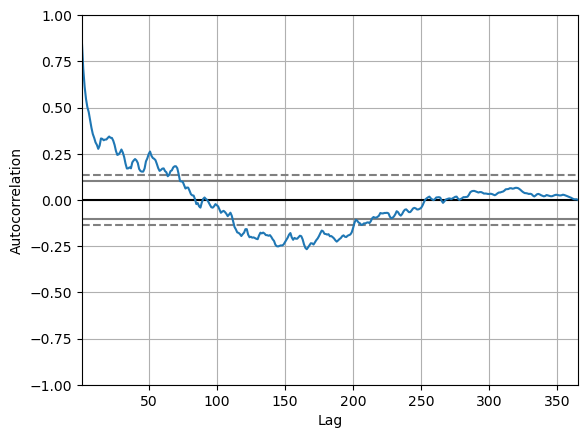

In [17]:
pd.plotting.autocorrelation_plot(data["Instagram reach"])

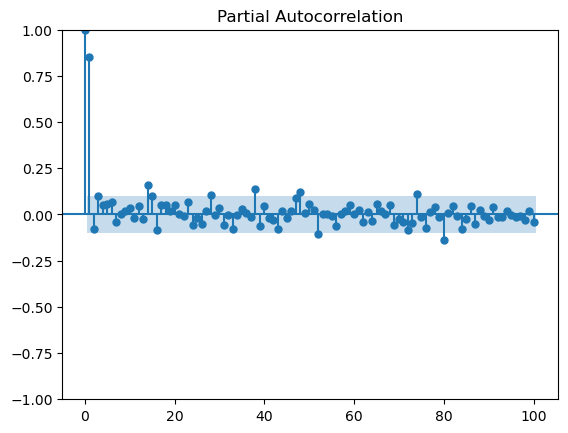

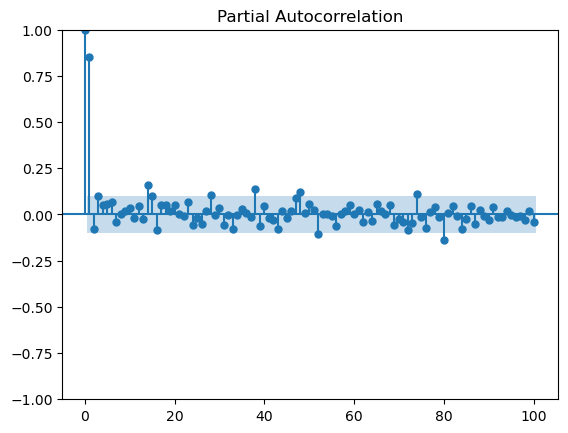

In [21]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data["Instagram reach"], lags = 100, method='ywm')

In [22]:
p, d, q = 8, 1, 2

import statsmodels.api as sm
import warnings
model=sm.tsa.statespace.SARIMAX(data['Instagram reach'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                                     SARIMAX Results                                      
Dep. Variable:                    Instagram reach   No. Observations:                  365
Model:             SARIMAX(8, 1, 2)x(8, 1, 2, 12)   Log Likelihood               -3938.512
Date:                            Sat, 29 Apr 2023   AIC                           7919.025
Time:                                    09:47:37   BIC                           8000.161
Sample:                                         0   HQIC                          7951.313
                                            - 365                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1887      6.625      0.028      0.977     -12.797      13.174
ar.L2          0.4790      6.176   

In [28]:
predictions = model.predict(len(data), len(data)+150)

trace_train = go.Scatter(x=data.index, y=data["Instagram reach"], mode="lines", name="Training Data")
trace_pred = go.Scatter(x=predictions.index, y=predictions, mode="lines", name="Predictions")

layout = go.Layout(title="Instagram Reach Time Series and Predictions", xaxis_title="Date", yaxis_title="Instagram Reach")

fig = go.Figure(data=[trace_train, trace_pred], layout=layout)
fig.show()

Summary

Instagram reach prediction is the process of predicting the number of people that an Instagram post, story, or other content will be reached, based on historical data and various other factors.